In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# df35 = pd.read_csv('Bfield_Mz_35_10_10_10_Ht_0.1.csv')
# df55 = pd.read_csv('Bfield_Mz_55_10_10_10_Ht_1.csv')


# df35['dMdB'] = np.gradient(df35['M_z'], df35['B_Field'])
# df35['dMdB'].hist(bins = 100)

/Users/jiakai/Desktop/SURF/code/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:1309: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2) / (dx1 * (dx1 + dx2))
/Users/jiakai/Desktop/SURF/code/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:1311: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/Users/jiakai/Desktop/SURF/code/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:1317: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] \


<Axes: >

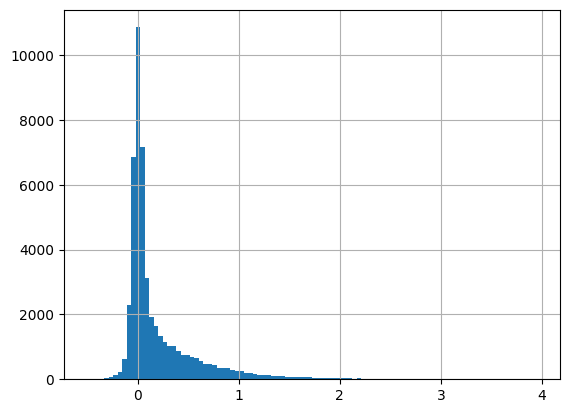

In [17]:
df55 = pd.read_csv('Bfield_Mz_55_10_10_10_Ht_1_ncycles_8.csv')
df55_H0 = pd.read_csv('Bfield_Mz_55_10_10_10_Ht_0.0_ncycles_8.csv')

df55['dMdB'] = np.gradient(df55['M_z'], df55['B_Field'])
df55['dMdB'].hist(bins = 100)

In [20]:
import plotly.express as px
fig = px.line(df55, x='B_Field', y='M_z', markers=True,
              labels={'B_Field': 'B Field', 'M_z': 'M_z'},
              title='M_z vs. B Field')
fig.write_html("Bfield_Mz_10_10_10_Ht_1_ncycles_8.html")

/Users/jiakai/Desktop/SURF/code/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:1309: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2) / (dx1 * (dx1 + dx2))
/Users/jiakai/Desktop/SURF/code/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:1311: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/Users/jiakai/Desktop/SURF/code/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:1317: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] \


<Axes: >

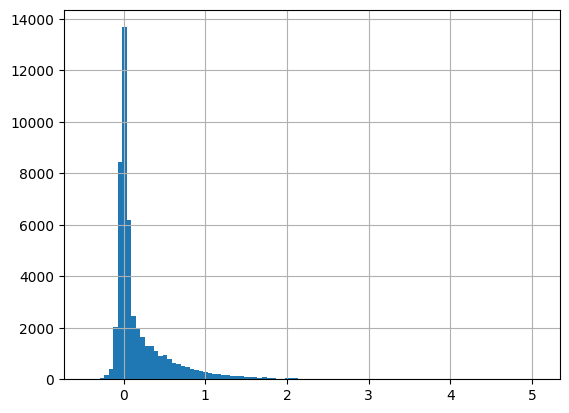

In [18]:
df55_H0['dMdB'] = np.gradient(df55_H0['M_z'], df55_H0['B_Field'])
df55_H0['dMdB'].hist(bins = 100)

In [34]:
threshold = -1
B_limit_up = 10
B_limit_down = 5

In [35]:
#Find continuous segments of rows that contain at least one row with dMdB > threshold, segment defined by endpoints turning negative

def get_large_avals(df):
    large_avals = [] # list of (dB, dM)
    has_large = False
    segment_started = False
    B_segment_start = 0
    M_segment_start = 0



    for i in range(len(df)):
        if abs(df['B_Field'].iloc[i])>B_limit_up or abs(df['B_Field'].iloc[i])<B_limit_down:
            segment_started = False
            has_large = False
            continue

        dMdB = df['dMdB'].iloc[i]
        if segment_started:
            if  dMdB > 0:
                if dMdB > threshold:
                    has_large = True
            else:
                dB = abs(B_segment_start - df['B_Field'].iloc[i])
                dM = abs(M_segment_start - df['M_z'].iloc[i])
                if has_large:
                    large_avals.append((dM, dB))
                segment_started = False
                has_large = False

        else:
            if dMdB>0:
                segment_started = True
                B_segment_start = df['B_Field'].iloc[i]
                M_segment_start = df['M_z'].iloc[i]
                if dMdB > threshold:
                    has_large = True


    return large_avals


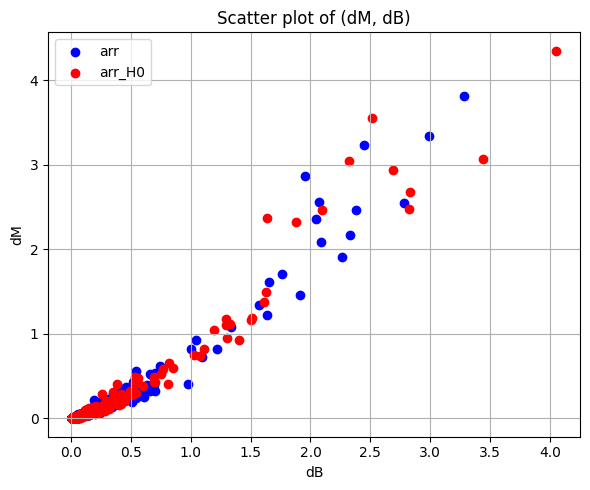

In [36]:
large_avals_H0 = get_large_avals(df55_H0)

arr_H0 = np.array(large_avals_H0)

large_avals = get_large_avals(df55)

arr = np.array(large_avals)

plt.figure(figsize=(6,5))
plt.scatter(arr[:,1], arr[:,0], color='blue', label='arr')
plt.scatter(arr_H0[:,1], arr_H0[:,0], color='red', label='arr_H0')
plt.ylabel('dM')
plt.xlabel('dB')
plt.title('Scatter plot of (dM, dB)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [38]:
df55


,B_Field,M_z,dMdB
0,20.000,3.690068,-0.101406
1,19.875,3.702744,-0.051770
2,19.750,3.703011,-0.000724
3,19.625,3.702925,0.000277
4,19.500,3.702941,0.000428
...,...,...,...
49275,19.375,3.326378,0.157166
49276,19.500,3.342665,0.129937
49277,19.625,3.358862,0.189958
49278,19.750,3.390155,0.210045
